In [1]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
import numpy
import tensorflow as tf
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from numpy import argmax
import numpy as np
from numpy.random import RandomState
np.random.seed(1)
#from sklearn.manifold import TSNE



from tsne import bh_sne
#from tsne.bh_sne import BH_SNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import os.path
import glob

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

import os
import os.path
import glob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
#from PIL import Image
from keras.preprocessing import image


from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

Using TensorFlow backend.


In [2]:
tf.__version__

'1.9.0'

In [3]:
imagedir = "/data/danish/Data/UPX-Packed-And-Unpacked-Samples"

In [4]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.*'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height,channels = (224,224,3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.png'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        list_paths.append(os.path.join(os.getcwd(),img_file))
        img = image.load_img(img_file, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" %(cnt))


os.chdir(cur_dir)

Label: 0	Family:           Phobi	Number of images: 34
Label: 1	Family:    Phobi-Packed	Number of images: 34
Label: 2	Family:           Tesla	Number of images: 57
Label: 3	Family:    Tesla-Packed	Number of images: 67
Processing images ...
Images processed: 192


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.301, random_state=42)

In [6]:
len(y_test)

58

In [7]:
test_path  = '/data/danish/Data/UPX-Packed-And-Unpacked-Samples-train-test/test/'

In [8]:
input_shape=(224,224)
batch_size=64
#save_fn='VGG16-Color='+str(input_shape[:])
#save_fn

In [9]:
datagen_test = ImageDataGenerator(rescale=1./255)

generator_test = datagen_test.flow_from_directory(directory=test_path,
                                                  target_size=input_shape,
                                                  class_mode='categorical',
                                                  #color_mode="rgb",
                                                  #save_prefix='Test_Aug',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=42)

steps_test = generator_test.n / batch_size
print("Steps for Test\n\n",steps_test)

cls_test = generator_test.classes
print("Labels of samples as integer\n\n",cls_test)

Found 58 images belonging to 4 classes.
Steps for Test

 0.90625
Labels of samples as integer

 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


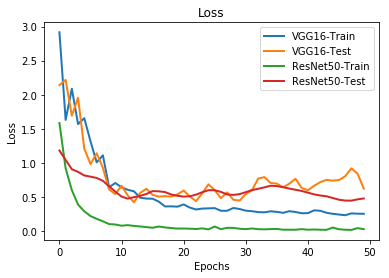

In [27]:
# read Traning History back from the file
pkl_file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-FT-Softmax/VGG16-FT-Softmax-history.pkl', 'rb')
VGG16 = pickle.load(pkl_file)
pkl_file.close()
# read Traning History back from the file
pkl_file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-FT-Softmax/ResNet50-FT-Softmax-history.pkl', 'rb')
ResNet50 = pickle.load(pkl_file)
pkl_file.close()


plt.title('Loss')
plt.plot(VGG16['loss'], label='VGG16-Train', linewidth=2)
plt.plot(VGG16['val_loss'], label='VGG16-Test', linewidth=2)
plt.plot(ResNet50['loss'], label='ResNet50-Train',linewidth=2)
plt.plot(ResNet50['val_loss'], label='ResNet50-Test',linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

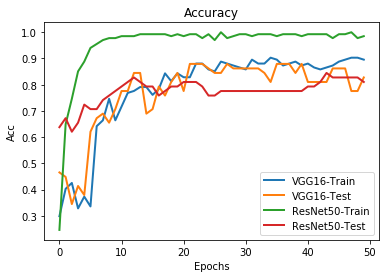

In [11]:
plt.title('Accuracy')
plt.plot(VGG16['acc'], label='VGG16-Train',linewidth=2)
plt.plot(VGG16['val_acc'], label='VGG16-Test',linewidth=2)
plt.plot(ResNet50['acc'], label='ResNet50-Train',linewidth=2)
plt.plot(ResNet50['val_acc'], label='ResNet50-Test',linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

#Ensemble_precision, Ensemble_recall, Ensemble_f1_score, _ = precision_recall_fscore_support(y_test, yhat, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/Ensemble/CM_Ensemble.pkl', 'rb')
Ensemble = pickle.load(file)
file.close()


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-TL-SVM/CM_VGG16_TL_SVM.pkl', 'rb')
VGG16_TL_SVM = pickle.load(file)
file.close()
#VGG16_TL_SVM_precision, VGG16_TL_SVM_recall, VGG16_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-FT-Softmax/CM_VGG16_FT_Softmax.pkl', 'rb')
VGG16_FT_Softmax = pickle.load(file)
file.close()
#VGG16_FT_Softmax_precision, VGG16_FT_Softmax_recall, VGG16_FT_Softmax_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-FT-SVM/CM_VGG16_FT_SVM.pkl', 'rb')
VGG16_FT_SVM = pickle.load(file)
file.close()
#VGG16_FT_Softmax_precision, VGG16_FT_Softmax_recall, VGG16_FT_Softmax_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-TL-SVM/CM_ResNet_TL_SVM.pkl', 'rb')
ResNet_TL_SVM = pickle.load(file)
file.close()
#ResNet_TL_SVM_precision, ResNet_TL_SVM_recall, ResNet_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, ResNet_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-FT-Softmax/CM_ResNet_FT_Softmax.pkl', 'rb')
ResNet_FT_Softmax = pickle.load(file)
file.close()
#ResNet_FT_Softmax_precision, ResNet_FT_Softmax_recall, ResNet_FT_Softmax_f1_score, _ = precision_recall_fscore_support(y_test, ResNet_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-FT-SVM/CM_ResNet_FT_SVM.pkl', 'rb')
ResNet_FT_SVM = pickle.load(file)
file.close()
#file = open('VGG16-ResNet50-TL+SVM(pred).pkl', 'rb')
#VGG16_ResNet_TL_SVM = pickle.load(file)
#file.close()
#VGG16_ResNet_TL_SVM_precision, VGG16_ResNet_TL_SVM_recall, VGG16_ResNet_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_ResNet_TL_SVM, average=None)




# False Positive

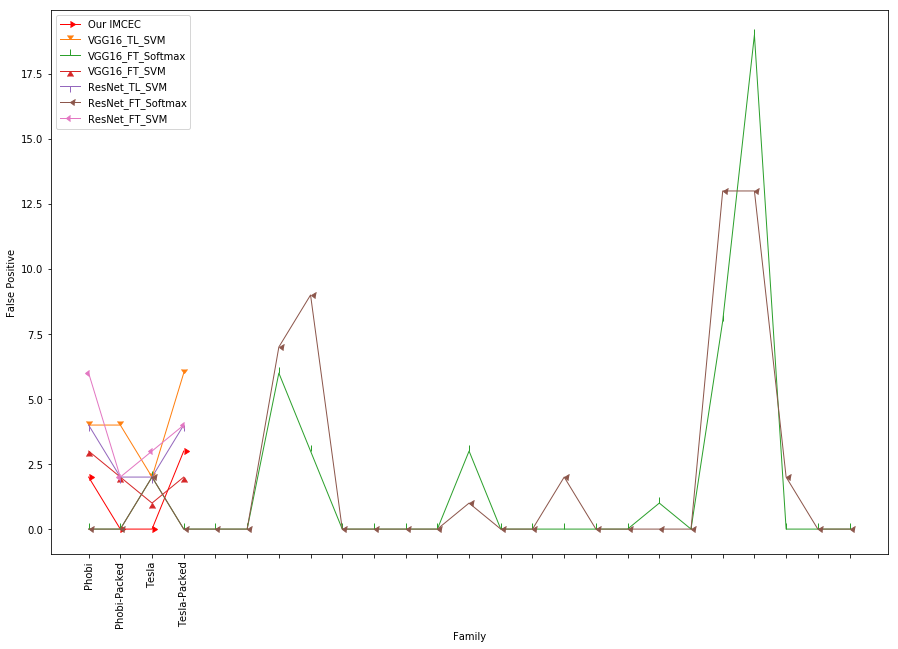

In [13]:
plt.figure(figsize = (15,10))


FP_Ensemble = Ensemble.FP.items()
x, y = zip(*FP_Ensemble)
plt.plot(x,y, Color='red', label='Our IMCEC',linewidth=1, marker=9)



FP_VGG16_TL_SVM = VGG16_TL_SVM.FP.items()
x1, y1 = zip(*FP_VGG16_TL_SVM)
plt.plot(x1,y1, label='VGG16_TL_SVM',linewidth=1, marker=7)

FP_VGG16_FT_Softmax = VGG16_FT_Softmax.FP.items()
x2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y2 = [0,0,2,0,0,0,6,3,0,0,0,0,3,0,0,0,0,0,1,0,8,19,0,0,0]
#x2, y2 = zip(*FP_VGG16_FT_Softmax)
plt.plot(x2,y2, label='VGG16_FT_Softmax',linewidth=1, marker=2)

FP_VGG16_FT_SVM = VGG16_FT_SVM.FP.items()
x6, y6 = zip(*FP_VGG16_FT_SVM)
plt.plot(x6,y6, label='VGG16_FT_SVM',linewidth=1, marker=6)





FP_ResNet_TL_SVM = ResNet_TL_SVM.FP.items()
x3, y3 = zip(*FP_ResNet_TL_SVM)
plt.plot(x3,y3, label='ResNet_TL_SVM',linewidth=1, marker=3)


FP_ResNet_FT_Softmax = ResNet_FT_Softmax.FP.items()
x4 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y4 = [0,0,2,0,0,0,7,9,0,0,0,0,1,0,0,2,0,0,0,0,13,13,2,0,0]
#x4, y4 = zip(*FP_ResNet_FT_Softmax)
plt.plot(x4,y4, label='ResNet_FT_Softmax',linewidth=1,marker=4)


FP_ResNet_FT_SVM = ResNet_FT_SVM.FP.items()
x5, y5 = zip(*FP_ResNet_FT_SVM)
plt.plot(x5,y5, label='ResNet_FT_SVM',linewidth=1, marker=8)





#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(25), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('False Positive')
plt.legend()

plt.show()

# precision_recall_fscore_support, accuracy_score

In [17]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/Ensemble/Ensemble(pred).pkl', 'rb')
Ensemble = pickle.load(file)
file.close()
Ensemble_precision, Ensemble_recall, Ensemble_f1_score, _ = precision_recall_fscore_support(y_test, Ensemble, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-TL-SVM/VGG16-TL-SVM(pred).pkl', 'rb')
VGG16_TL_SVM = pickle.load(file)
file.close()
VGG16_TL_SVM_precision, VGG16_TL_SVM_recall, VGG16_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-FT-Softmax/VGG16-FT-Softmax(pred).pkl', 'rb')
VGG16_FT_Softmax = pickle.load(file)
file.close()
VGG16_FT_Softmax_precision, VGG16_FT_Softmax_recall, VGG16_FT_Softmax_f1_score, _ = precision_recall_fscore_support(cls_test, VGG16_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/VGG16-FT-SVM/VGG16-FT-SVM(pred).pkl', 'rb')
VGG16_FT_SVM = pickle.load(file)
file.close()
VGG16_FT_SVM_precision, VGG16_FT_SVM_recall, VGG16_FT_SVM_f1_score, _ = precision_recall_fscore_support(y_test, VGG16_FT_SVM, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-TL-SVM/ResNet-TL-SVM(pred).pkl', 'rb')
ResNet_TL_SVM = pickle.load(file)
file.close()
ResNet_TL_SVM_precision, ResNet_TL_SVM_recall, ResNet_TL_SVM_f1_score, _ = precision_recall_fscore_support(y_test, ResNet_TL_SVM, average=None)


file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-FT-Softmax/ResNet-FT-Softmax(pred).pkl', 'rb')
ResNet_FT_Softmax = pickle.load(file)
file.close()
ResNet_FT_Softmax_precision, ResNet_FT_Softmax_recall, ResNet_FT_Softmax_f1_score, _ = precision_recall_fscore_support(cls_test, ResNet_FT_Softmax, average=None)

file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-FT-SVM/ResNet-FT-SVM(pred).pkl', 'rb')
ResNet_FT_SVM = pickle.load(file)
file.close()
ResNet_FT_SVM_precision, ResNet_FT_SVM_recall, ResNet_FT_SVM_f1_score, danish = precision_recall_fscore_support(y_test, ResNet_FT_SVM, average=None)


In [18]:
file

<_io.BufferedReader name='/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/Obfuscation/ResNet-FT-SVM/ResNet-FT-SVM(pred).pkl'>

# F1-Score

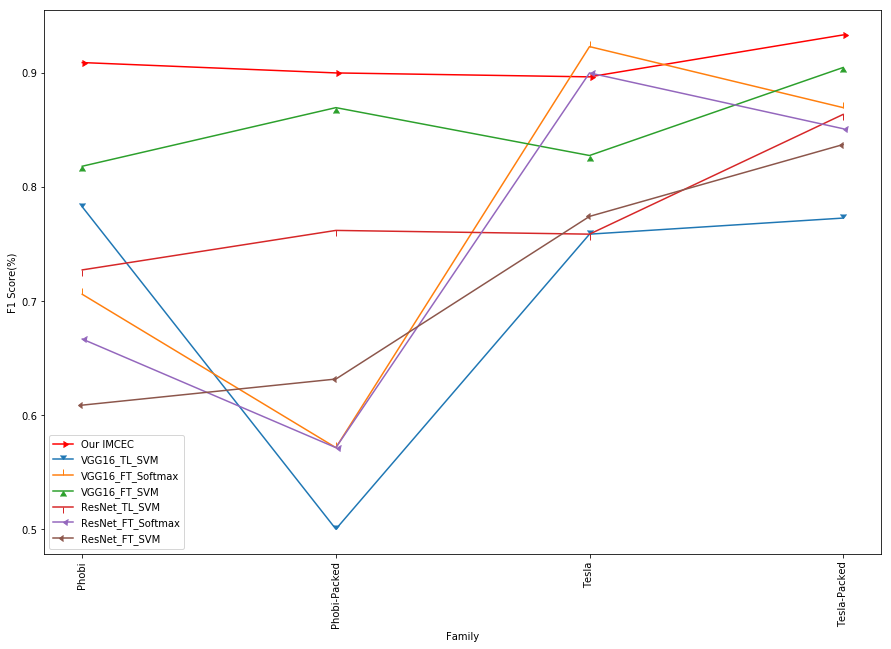

In [23]:
import collections


#plt.title('Accuracy')
plt.figure(figsize = (15,10))



plt.plot(Ensemble_f1_score, color='red' ,label='Our IMCEC', marker=9)

plt.plot(VGG16_TL_SVM_f1_score, label='VGG16_TL_SVM', marker=7)
plt.plot(VGG16_FT_Softmax_f1_score, label='VGG16_FT_Softmax', marker=2)
plt.plot(VGG16_FT_SVM_f1_score, label='VGG16_FT_SVM', marker=6)

plt.plot(ResNet_TL_SVM_f1_score, label='ResNet_TL_SVM', marker=3)
plt.plot(ResNet_FT_Softmax_f1_score, label='ResNet_FT_Softmax', marker=4)
plt.plot(ResNet_FT_SVM_f1_score, label='ResNet_FT_SVM', marker=8)

#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)



#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(4), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('F1 Score(%)')
plt.legend()

plt.show()

# Precision

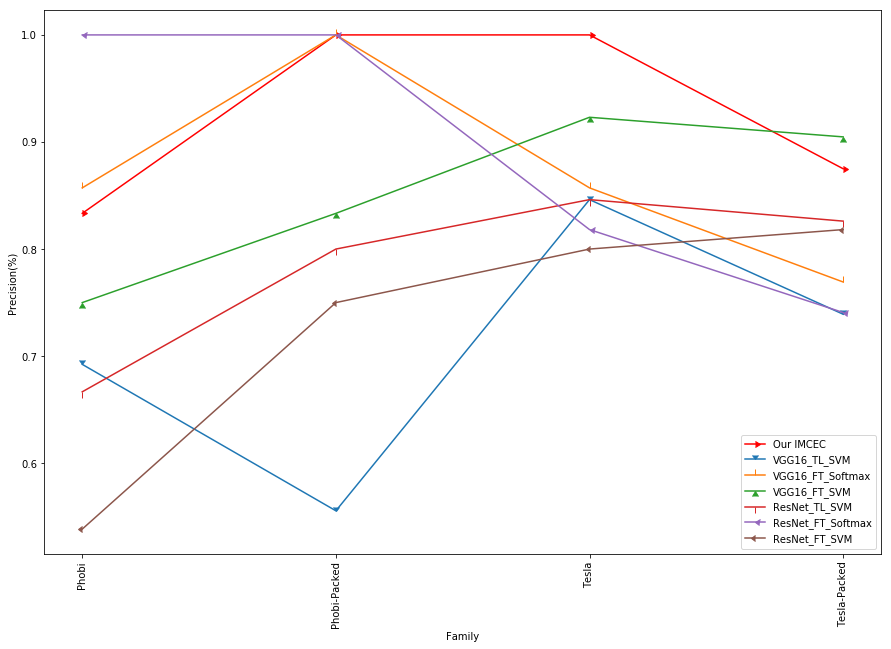

In [24]:
import collections


#plt.title('Accuracy')
plt.figure(figsize = (15,10))



plt.plot(Ensemble_precision, color='red' ,label='Our IMCEC', marker=9)

plt.plot(VGG16_TL_SVM_precision, label='VGG16_TL_SVM', marker=7)
plt.plot(VGG16_FT_Softmax_precision, label='VGG16_FT_Softmax', marker=2)
plt.plot(VGG16_FT_SVM_precision, label='VGG16_FT_SVM', marker=6)

plt.plot(ResNet_TL_SVM_precision, label='ResNet_TL_SVM', marker=3)
plt.plot(ResNet_FT_Softmax_precision, label='ResNet_FT_Softmax', marker=4)
plt.plot(ResNet_FT_SVM_precision, label='ResNet_FT_SVM', marker=8)

#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)



#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(4), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('Precision(%)')
plt.legend()

plt.show()

# Recall

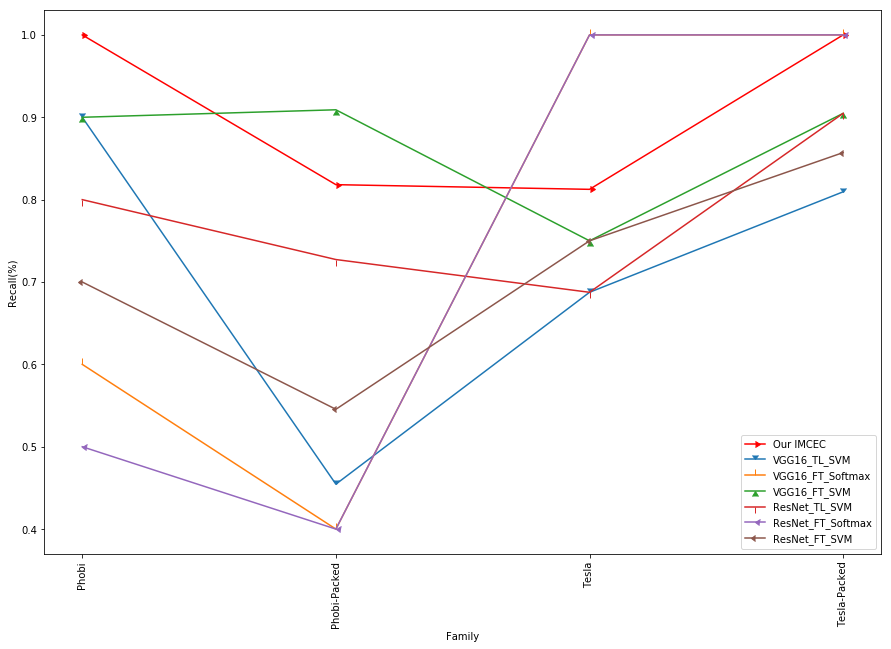

In [26]:
import collections


#plt.title('Accuracy')
plt.figure(figsize = (15,10))



plt.plot(Ensemble_recall, color='red' ,label='Our IMCEC', marker=9)

plt.plot(VGG16_TL_SVM_recall, label='VGG16_TL_SVM', marker=7)
plt.plot(VGG16_FT_Softmax_recall, label='VGG16_FT_Softmax', marker=2)
plt.plot(VGG16_FT_SVM_recall, label='VGG16_FT_SVM', marker=6)

plt.plot(ResNet_TL_SVM_recall, label='ResNet_TL_SVM', marker=3)
plt.plot(ResNet_FT_Softmax_recall, label='ResNet_FT_Softmax', marker=4)
plt.plot(ResNet_FT_SVM_recall, label='ResNet_FT_SVM', marker=8)

#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)
#plt.plot(Ensemble_f1_score, color='red' ,label='Our Ensemble',linewidth=1, marker=9)



#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 20])
plt.xticks(np.arange(4), list_fams, rotation=90)
plt.xlabel('Family')
plt.ylabel('Recall(%)')
plt.legend()

plt.show()

# Precision or Positive Perdictive Value

In [ ]:
print(Ensemble)